In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
df=pd.read_csv("Leads.csv")

### Step 1: Inspect the Data

In [297]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [298]:

# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


In [299]:
### Checking the  conversion rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

38.53896103896104

We have almost 40% conversion rate

In [300]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [301]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [302]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Drop Irrelevant Columns


In [303]:

df=df.drop(["Prospect ID","Lead Number"  ],axis=1)

#### Imbalance Analysis- Threshold 90%

In [304]:

def check_imbalance(df, threshold=0.9):
    imbalance_report = {}
    
    for column in df.columns:
        value_counts = df[column].value_counts(normalize=True)
        most_frequent_value_proportion = value_counts.iloc[0]
        
        if most_frequent_value_proportion > threshold:
            imbalance_report[column] = {
                'Most Frequent Value': value_counts.index[0],
                'Proportion': most_frequent_value_proportion
            }
    
    return imbalance_report

# Example usage
imbalance_report = check_imbalance(df)
if imbalance_report:
    for column, info in imbalance_report.items():
        print(f"Column '{column}' is imbalanced with {info['Proportion'] * 100:.2f}% of values being '{info['Most Frequent Value']}'.")
else:
    print("No imbalanced columns found.")


Column 'Do Not Email' is imbalanced with 92.06% of values being 'No'.
Column 'Do Not Call' is imbalanced with 99.98% of values being 'No'.
Column 'Country' is imbalanced with 95.77% of values being 'India'.
Column 'What matters most to you in choosing a course' is imbalanced with 99.95% of values being 'Better Career Prospects'.
Column 'Search' is imbalanced with 99.85% of values being 'No'.
Column 'Magazine' is imbalanced with 100.00% of values being 'No'.
Column 'Newspaper Article' is imbalanced with 99.98% of values being 'No'.
Column 'X Education Forums' is imbalanced with 99.99% of values being 'No'.
Column 'Newspaper' is imbalanced with 99.99% of values being 'No'.
Column 'Digital Advertisement' is imbalanced with 99.96% of values being 'No'.
Column 'Through Recommendations' is imbalanced with 99.92% of values being 'No'.
Column 'Receive More Updates About Our Courses' is imbalanced with 100.00% of values being 'No'.
Column 'Update me on Supply Chain Content' is imbalanced with 1

In [305]:
# Dropping imbalanced columns
columns_to_drop = list(imbalance_report.keys())
df = df.drop(columns=columns_to_drop)

#### Handling 'Select' in Categorical Variables


In [306]:

# Calculate percentage of rows containing 'Select' in each column
select_columns_percentage = {column: df[column].astype(str).apply(lambda x: 'Select' in x).mean() * 100 for column in df.columns if any(df[column].astype(str).apply(lambda x: 'Select' in x))}

# Convert to DataFrame for better visualization
select_percentage_df = pd.DataFrame(list(select_columns_percentage.items()), columns=['Column', 'Percentage Containing Select'])

# Display the DataFrame
print(select_percentage_df)


                               Column  Percentage Containing Select
0                      Specialization                     21.017316
1  How did you hear about X Education                     54.577922
2                        Lead Profile                     44.870130
3                                City                     24.339827


In [307]:
# convert Select into null
df.replace("Select", None, inplace=True)




#### Find Missing Values and Handling them


In [308]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages.sort_values(ascending=False, inplace=True)
missing_percentages

How did you hear about X Education        78.463203
Lead Profile                              74.188312
Lead Quality                              51.590909
Asymmetrique Activity Index               45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Profile Score                45.649351
City                                      39.707792
Specialization                            36.580087
Tags                                      36.287879
What is your current occupation           29.112554
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable

In [309]:
# Drop columns with more than 25% missing values
missing_percentages_threshold = [col for col in df.columns if missing_percentages[col] > 25]


In [310]:
df.drop(missing_percentages_threshold,axis=1,inplace=True)

In [311]:
df.shape

(9240, 9)

In [312]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


In [313]:
missing_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percentages

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Lead Source                               0.389610
Lead Origin                               0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [314]:
df[["TotalVisits","Page Views Per Visit","Last Activity","Lead Source"]].head()

,TotalVisits,Page Views Per Visit,Last Activity,Lead Source
0,0.0,0.0,Page Visited on Website,Olark Chat
1,5.0,2.5,Email Opened,Organic Search
2,2.0,2.0,Email Opened,Direct Traffic
3,1.0,1.0,Unreachable,Direct Traffic
4,2.0,1.0,Converted to Lead,Google


In [315]:
df[["TotalVisits","Page Views Per Visit","Last Activity","Lead Source"]].describe(include="all")             

,TotalVisits,Page Views Per Visit,Last Activity,Lead Source
count,9103.000000,9103.000000,9137,9204
unique,NaN,NaN,17,21
top,NaN,NaN,Email Opened,Google
freq,NaN,NaN,3437,2868
mean,3.445238,2.362820,NaN,NaN
std,4.854853,2.161418,NaN,NaN
min,0.000000,0.000000,NaN,NaN
25%,1.000000,1.000000,NaN,NaN
50%,3.000000,2.000000,NaN,NaN
75%,5.000000,3.000000,NaN,NaN


#### Imputing Missing Values

In [316]:
# Impute TotalVisit and Page Views Per Visit with mean but since these values needs to be s whole number so we will be using the round() function.
df['TotalVisits'] = df['TotalVisits'].fillna(round(df['TotalVisits'].mean()))
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(round(df['Page Views Per Visit'].mean()))




In [317]:
# Impute missing values for categorical columns using mode
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])
df['Lead Source']=df['Lead Source'].fillna(df['Lead Source'].mode()[0])

In [318]:
missing_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percentages

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Step 2: Data Preparation

#### Converting binary variables (Yes/No) to 1/0


In [319]:

def convert_binary_columns_to_numeric(df):
    """
    Convert binary columns (Yes/No) to 1/0 in a pandas DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data

    Returns:
    - None (modifies df in place)
    """
    for column in df.columns:
        if df[column].isin(['Yes', 'No']).all():
            df[column] = df[column].map({'Yes': 1, 'No': 0})

In [320]:
convert_binary_columns_to_numeric(df)
df.head() # Print first few rows to verify

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   int64  
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 649.8+ KB


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)


In [322]:
# Find Categorical Columns with more than two unique values

categorical_columns = df.select_dtypes(include=['object']).columns

# Strip leading and trailing spaces from categorical columns (if any)
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())



In [323]:
df[categorical_columns]

,Lead Origin,Lead Source,Last Activity,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Modified
1,API,Organic Search,Email Opened,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Modified
4,Landing Page Submission,Google,Converted to Lead,Modified
...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,SMS Sent


In [324]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Unique values in 'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Unique values in 'Last Activity': ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Unique values in 'Last Notable Activity': ['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounced'
 'Email Link Clicked' 'Unreachable' 'Unsubscribed'
 'Ha

#### Short Abbrevations of the values 

In [325]:
# Dictionary mapping for abbreviations
abbreviations = {
    'Lead Origin': {'API': 'API', 'Landing Page Submission': 'LPS', 'Lead Add Form': 'LAF', 'Lead Import': 'LI', 'Quick Add Form': 'QAF'},
    'Lead Source': {'Olark Chat': 'Olark', 'Organic Search': 'Organic', 'Direct Traffic': 'Direct', 'Google': 'Google', 'Referral Sites': 'Referral'},
    'Last Activity': {'Page Visited on Website': 'Visit', 'Email Opened': 'Open', 'Unreachable': 'Unreach', 'Converted to Lead': 'Convert', 'Olark Chat Conversation': 'Olark Chat'},
    'Last Notable Activity': {'Modified': 'Modified', 'Email Opened': 'Open', 'Page Visited on Website': 'Visit', 'Email Bounced': 'Bounce', 'Unreachable': 'Unreach'}
}

In [326]:
# Replace values in each categorical column with abbreviations
for column in df.columns:
    if column in abbreviations:
        df[column] = df[column].map(abbreviations[column])

In [327]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark,0,0.0,0,0.0,Visit,0,Modified
1,API,Organic,0,5.0,674,2.5,Open,0,Open
2,LPS,Direct,1,2.0,1532,2.0,Open,1,Open
3,LPS,Direct,0,1.0,305,1.0,Unreach,0,Modified
4,LPS,Google,1,2.0,1428,1.0,Convert,0,Modified


In [328]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[categorical_columns],prefix_sep="_", dtype="int", drop_first=True)



In [329]:
df = pd.concat([df, dummy1], axis=1)

In [330]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_LAF,...,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
0,API,Olark,0,0.0,0,0.0,Visit,0,Modified,0,...,0,0,0,0,0,1,1,0,0,0
1,API,Organic,0,5.0,674,2.5,Open,0,Open,0,...,1,0,0,1,0,0,0,1,0,0
2,LPS,Direct,1,2.0,1532,2.0,Open,1,Open,0,...,0,0,0,1,0,0,0,1,0,0
3,LPS,Direct,0,1.0,305,1.0,Unreach,0,Modified,0,...,0,0,0,0,1,0,1,0,0,0
4,LPS,Google,1,2.0,1428,1.0,Convert,0,Modified,0,...,0,0,0,0,0,0,1,0,0,0


#### Drop the categorical columns

In [331]:
df=df.drop(categorical_columns,axis=1)

In [332]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LAF,Lead Origin_LI,Lead Origin_LPS,Lead Origin_QAF,Lead Source_Google,...,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [333]:
df.shape

(9240, 21)

In [334]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Converted                               9240 non-null   int64  
 1   TotalVisits                             9240 non-null   float64
 2   Total Time Spent on Website             9240 non-null   int64  
 3   Page Views Per Visit                    9240 non-null   float64
 4   A free copy of Mastering The Interview  9240 non-null   int64  
 5   Lead Origin_LAF                         9240 non-null   int64  
 6   Lead Origin_LI                          9240 non-null   int64  
 7   Lead Origin_LPS                         9240 non-null   int64  
 8   Lead Origin_QAF                         9240 non-null   int64  
 9   Lead Source_Google                      9240 non-null   int64  
 10  Lead Source_Olark                       9240 non-null   int6

#### Checking for Outliers

In [335]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LAF,Lead Origin_LI,Lead Origin_LPS,Lead Origin_QAF,Lead Source_Google,...,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554,0.077706,0.005952,0.528788,0.000108,0.314286,...,0.124892,0.013528,0.105303,0.383117,0.010065,0.069264,0.368723,0.305952,0.003463,0.034416
std,0.486714,4.819024,548.021466,2.145781,0.463559,0.267722,0.076926,0.499198,0.010403,0.464256,...,0.330614,0.115527,0.306960,0.486173,0.099823,0.253916,0.482485,0.460835,0.058750,0.182304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [336]:
continuous_numeric_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]) and df[column].nunique() >2:
        continuous_numeric_columns.append(column)

print("Continuous numerical columns:")
print(continuous_numeric_columns)

Continuous numerical columns:
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [337]:
num_df=df[continuous_numeric_columns]

In [338]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### Insights:

- Leads visiting the website typically make around 3.44 visits and view approximately 2.36 pages per visit, with significant variability and occasional outliers indicating deeper engagement.

- Outliers in engagement metrics (like total visits and time spent) could skew the data distribution. Applying robust methods like IQR  may help normalize the data for more reliable logistic regression modeling, reducing the potential impact of extreme values on model accuracy and interpretation.



#### Apply IQR to replace outliers with upper and lower bound`

In [339]:
def apply_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        # Option 1: Remove outliers
        # df = df[~outliers]
        
        # Option 2: Cap outliers at the bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Applying IQR method to specified columns
columns_to_process = ['TotalVisits', 'Page Views Per Visit']
df= apply_iqr(df, columns_to_process)


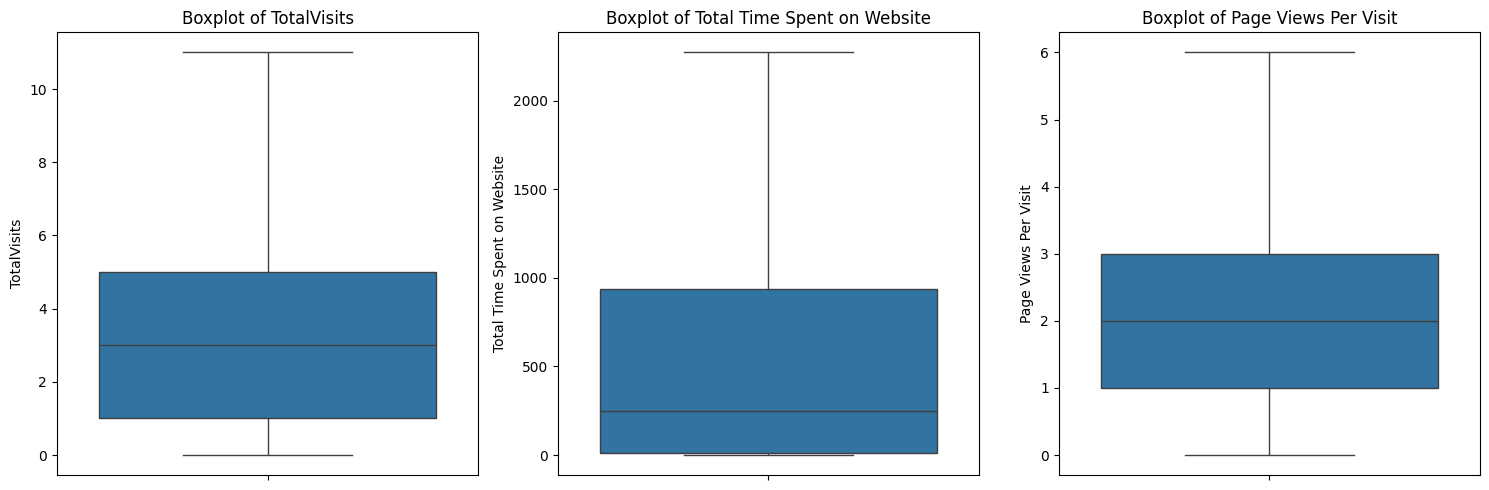

In [340]:
def plot_boxplot_subplots(df, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_boxplot_subplots(df, continuous_numeric_columns)

In [341]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_LAF,Lead Origin_LI,Lead Origin_LPS,Lead Origin_QAF,Lead Source_Google,...,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,2.0,1428,1.0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


### Step 3: Looking at Correlations

In [342]:


# Assuming df is your DataFrame containing numeric features and 'Converted' target variable

# Step 1: Calculate correlation matrix among features
corr_matrix = df.corr().abs()

# Step 2: Find top 5 unique correlations among features
# Stack the correlation matrix, exclude self-correlation (1.0), and reset index
stacked_corr = corr_matrix.stack().reset_index()
stacked_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
# Exclude where Feature 1 equals Feature 2 to remove self-correlations
top_corr_among_features = (stacked_corr[stacked_corr['Feature 1'] != stacked_corr['Feature 2']]
                           .sort_values(by='Correlation', ascending=False)
                           .drop_duplicates(subset=['Correlation'], keep='first')
                           .head(5))

# Step 3: Calculate correlations with the target variable 'Converted'
correlations_with_target = corr_matrix['Converted'].drop('Converted').sort_values(ascending=False)

# Step 4: Find top 5 correlations with the target variable 'Converted' (excluding self-correlation)
top_5_corr_with_target = correlations_with_target.head(5)

# Print results
print("Top 5 unique correlations among features:")
print(top_corr_among_features)
print("\nTop 5 correlations with the target variable 'Converted':")
print(top_5_corr_with_target)


Top 5 unique correlations among features:
                         Feature 1              Feature 2  Correlation
392     Last Notable Activity_Open     Last Activity_Open     0.842496
64            Page Views Per Visit            TotalVisits     0.753953
436    Last Notable Activity_Visit    Last Activity_Visit     0.692057
414  Last Notable Activity_Unreach  Last Activity_Unreach     0.584642
213              Lead Source_Olark   Page Views Per Visit     0.573334

Top 5 correlations with the target variable 'Converted':
Total Time Spent on Website       0.362483
Lead Origin_LAF                   0.321702
Last Notable Activity_Modified    0.244294
Last Activity_Olark Chat          0.210809
Lead Source_Olark                 0.129459
Name: Converted, dtype: float64


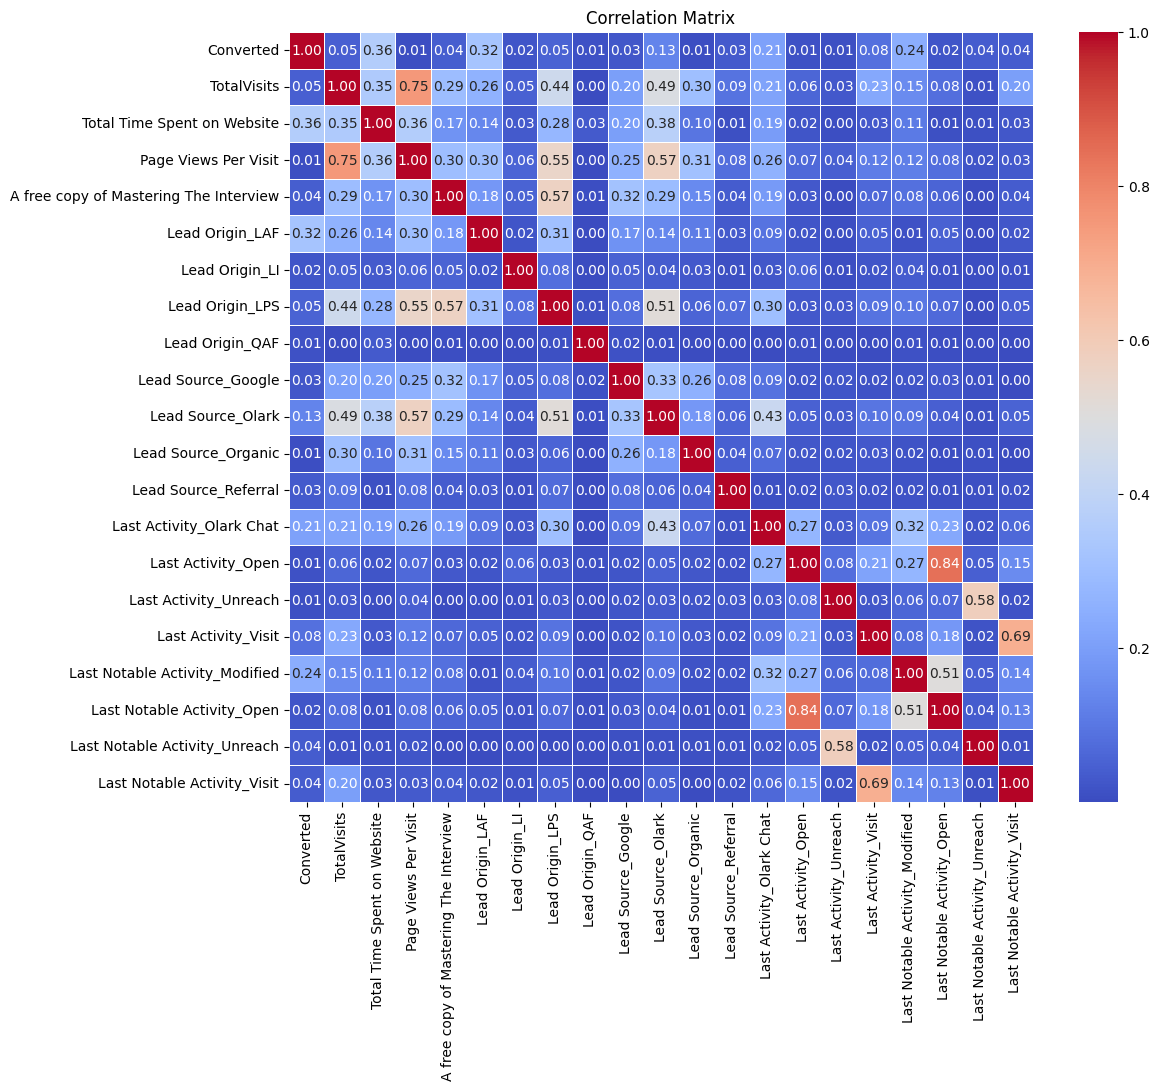

In [343]:
# Visualization of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Insights:

- **TotalVisits** & **Page Views Per Visit**  has high correlation of 75 % so we are going to drop **Page Views Per Visit**

In [344]:
df=df.drop("Page Views Per Visit",axis=1)

In [345]:
df.shape

(9240, 20)

### Step 4: Test-Train Split

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
# Putting feature variable to X
X = df.drop("Converted", axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_LAF,Lead Origin_LI,Lead Origin_LPS,Lead Origin_QAF,Lead Source_Google,Lead Source_Olark,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,5.0,674,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,2.0,1532,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,305,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,2.0,1428,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [348]:
y=df["Converted"]

In [349]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [350]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 5: Feature Scaling

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

In [353]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_LAF,Lead Origin_LI,Lead Origin_LPS,Lead Origin_QAF,Lead Source_Google,Lead Source_Olark,Lead Source_Organic,Lead Source_Referral,Last Activity_Olark Chat,Last Activity_Open,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
4715,-1.128195,-0.887525,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
7132,-0.433491,1.386983,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
8954,0.261212,-0.182209,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5283,2.692673,1.315905,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3003,-0.086140,1.580170,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### Step 6: Model Building


In [354]:
import statsmodels.api as sm

In [355]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2996.5
Date:                Wed, 17 Jul 2024   Deviance:                       5993.1
Time:                        00:10:30   Pearson chi2:                 6.80e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3333
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0190      0.124      0.153      0.879      -0.225       0.263
TotalVisits                                0.2099      0.042      4.961      0.000       0.127       0.293
Total Time Spent on Website                1.0713      0.037     28.638      0.000       0.998       1.145
A free copy of Mastering The Interview    -0.0825      0.096     -0.860      0.390      -0.270       0.105
Lead Origin_LAF                            4.3284      0.216     20.016      0.000       3.905       4.752
Lead Origin_LI                             0.6124      0.447      1.370      0.171      -0.264       1.489
Lead Origin_LPS                           -0.1490      0.097     -1.541      0.123      -0.338       0.040
Lead Origin_QAF                           18.4907   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                         0.2747      0.102      2.699      0.007       0.075       0.474
Lead Source_Olark                          1.2061      0.146      8.274      0.000       0.920       1.492
Lead Source_Organic                        0.0541      0.116      0.467      0.641      -0.173       0.281
Lead Source_Referral                      -0.0515      0.308     -0.167      0.867      -0.656       0.553
Last Activity_Olark Chat                  -1.6230      0.165     -9.849      0.000      -1.946      -1.300
Last Activity_Open                         0.2401      0.145      1.659      0.097      -0.044       0.524
Last Activity_Unreach                     -1.2530      0.567     -2.211      0.027      -2.364      -0.142
Last Activity_Visit                       -0.4339      0.211     -2.057      0.040      -0.847      -0.020
Last Notable Activity_Modified            -1.5780      0.098    -16.150      0.000      -1.769      -1.386
Last Notable Activity_Open                -1.3968      0.163     -8.579      0.000      -1.716      -1.078
Last Notable Activity_Unreach              2.0382      0.767      2.659      0.008       0.536       3.541
Last Notable Activity_Visit               -1.2011      0.273     -4.407      0.000      -1.735      -0.667
==========================================================================================================
"""

### Step 7: Feature Selection Using RFE

In [356]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [357]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [358]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True])

In [359]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.False_, np.int64(4)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('A free copy of Mastering The Interview', np.False_, np.int64(6)),
 ('Lead Origin_LAF', np.True_, np.int64(1)),
 ('Lead Origin_LI', np.True_, np.int64(1)),
 ('Lead Origin_LPS', np.False_, np.int64(3)),
 ('Lead Origin_QAF', np.False_, np.int64(7)),
 ('Lead Source_Google', np.True_, np.int64(1)),
 ('Lead Source_Olark', np.True_, np.int64(1)),
 ('Lead Source_Organic', np.False_, np.int64(8)),
 ('Lead Source_Referral', np.False_, np.int64(5)),
 ('Last Activity_Olark Chat', np.True_, np.int64(1)),
 ('Last Activity_Open', np.False_, np.int64(2)),
 ('Last Activity_Unreach', np.True_, np.int64(1)),
 ('Last Activity_Visit', np.True_, np.int64(1)),
 ('Last Notable Activity_Modified', np.True_, np.int64(1)),
 ('Last Notable Activity_Open', np.True_, np.int64(1)),
 ('Last Notable Activity_Unreach', np.True_, np.int64(1)),
 ('Last Notable Activity_Visit', np.True_, np.int64(1))]

In [360]:
col = X_train.columns[rfe.support_]

In [361]:
col

Index(['Total Time Spent on Website', 'Lead Origin_LAF', 'Lead Origin_LI',
       'Lead Source_Google', 'Lead Source_Olark', 'Last Activity_Olark Chat',
       'Last Activity_Unreach', 'Last Activity_Visit',
       'Last Notable Activity_Modified', 'Last Notable Activity_Open',
       'Last Notable Activity_Unreach', 'Last Notable Activity_Visit'],
      dtype='object')

In [362]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_LPS', 'Lead Origin_QAF', 'Lead Source_Organic',
       'Lead Source_Referral', 'Last Activity_Open'],
      dtype='object')

##### Assessing the model with StatsModels

In [363]:
X_train[col].columns

Index(['Total Time Spent on Website', 'Lead Origin_LAF', 'Lead Origin_LI',
       'Lead Source_Google', 'Lead Source_Olark', 'Last Activity_Olark Chat',
       'Last Activity_Unreach', 'Last Activity_Visit',
       'Last Notable Activity_Modified', 'Last Notable Activity_Open',
       'Last Notable Activity_Unreach', 'Last Notable Activity_Visit'],
      dtype='object')

In [364]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.4
Date:                Wed, 17 Jul 2024   Deviance:                       6028.9
Time:                        00:10:31   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3296
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0745      0.067     -1.112      0.266      -0.206       0.057
Total Time Spent on Website        1.0853      0.037     29.177      0.000       1.012       1.158
Lead Origin_LAF                    4.2328      0.189     22.360      0.000       3.862       4.604
Lead Origin_LI                     0.6585      0.431      1.530      0.126      -0.185       1.502
Lead Source_Google                 0.3270      0.073      4.474      0.000       0.184       0.470
Lead Source_Olark                  1.0997      0.101     10.855      0.000       0.901       1.298
Last Activity_Olark Chat          -1.6089      0.160    -10.035      0.000      -1.923      -1.295
Last Activity_Unreach             -1.2698      0.567     -2.241      0.025      -2.381      -0.159
Last Activity_Visit               -0.4002      0.204     -1.959      0.050      -0.801       0.000
Last Notable Activity_Modified    -1.5410      0.086    -17.874      0.000      -1.710      -1.372
Last Notable Activity_Open        -1.1390      0.079    -14.501      0.000      -1.293      -0.985
Last Notable Activity_Unreach      2.0799      0.766      2.716      0.007       0.579       3.581
Last Notable Activity_Visit       -1.0222      0.268     -3.821      0.000      -1.547      -0.498
==================================================================================================
"""

In [365]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.254075
7132    0.572449
8954    0.432358
5283    0.482829
3003    0.524853
478     0.043610
1352    0.647561
3166    0.387889
7700    0.238065
2647    0.043610
dtype: float64

In [366]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25407494, 0.57244937, 0.43235792, 0.48282928, 0.52485287,
       0.04360951, 0.64756106, 0.38788917, 0.23806492, 0.04360951])

##### Creating a dataframe with the actual lead conversion and the predicted probabilities

In [367]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID
0,0,0.254075,4715
1,1,0.572449,7132
2,0,0.432358,8954
3,0,0.482829,5283
4,0,0.524853,3003


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [368]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted
0,0,0.254075,4715,0
1,1,0.572449,7132,1
2,0,0.432358,8954,0
3,0,0.482829,5283,0
4,0,0.524853,3003,1


In [369]:
from sklearn import metrics

In [370]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3432  552]
 [ 824 1660]]


In [371]:
# [[3439  545]
# [ 817 1667]]
# True Positives (TP): 1667 (Predicted Converted and actually Converted)
# True Negatives (TN): 3439 (Predicted Not Converted and actually Not Converted)
# False Positives (FP): 545 (Predicted Converted but actually Not Converted)
# False Negatives (FN): 817 (Predicted Not Converted but actually Converted)

In [372]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7872603586889301


#### Checking VIFs

In [373]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [374]:
def calculate_vif(df, col_names):
    """
    Calculate VIF for the columns in the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - col_names: List of column names for which VIF needs to be calculated.

    Returns:
    - DataFrame with columns 'Features' and 'VIF' sorted by VIF in descending order.
    """
    # Subset the DataFrame with the specified columns
    df_subset = df[col_names]
    
    # Calculate VIF for each column
    vif_data = pd.DataFrame()
    vif_data['Features'] = df_subset.columns
    vif_data['VIF'] = [variance_inflation_factor(df_subset.values, i) for i in range(df_subset.shape[1])]
    vif_data['VIF'] = round(vif_data['VIF'], 2)
    
    # Sort by VIF in descending order
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    
    return vif_data


In [375]:
vif_result = calculate_vif(X_train, col)
print(vif_result)

                          Features   VIF
0              Last Activity_Visit  2.41
1      Last Notable Activity_Visit  2.30
2   Last Notable Activity_Modified  1.76
3                Lead Source_Olark  1.70
4            Last Activity_Unreach  1.64
5    Last Notable Activity_Unreach  1.62
6         Last Activity_Olark Chat  1.58
7               Lead Source_Google  1.42
8       Last Notable Activity_Open  1.31
9      Total Time Spent on Website  1.20
10                 Lead Origin_LAF  1.09
11                  Lead Origin_LI  1.02


In [376]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.4
Date:                Wed, 17 Jul 2024   Deviance:                       6028.9
Time:                        00:10:33   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3296
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0745      0.067     -1.112      0.266      -0.206       0.057
Total Time Spent on Website        1.0853      0.037     29.177      0.000       1.012       1.158
Lead Origin_LAF                    4.2328      0.189     22.360      0.000       3.862       4.604
Lead Origin_LI                     0.6585      0.431      1.530      0.126      -0.185       1.502
Lead Source_Google                 0.3270      0.073      4.474      0.000       0.184       0.470
Lead Source_Olark                  1.0997      0.101     10.855      0.000       0.901       1.298
Last Activity_Olark Chat          -1.6089      0.160    -10.035      0.000      -1.923      -1.295
Last Activity_Unreach             -1.2698      0.567     -2.241      0.025      -2.381      -0.159
Last Activity_Visit               -0.4002      0.204     -1.959      0.050      -0.801       0.000
Last Notable Activity_Modified    -1.5410      0.086    -17.874      0.000      -1.710      -1.372
Last Notable Activity_Open        -1.1390      0.079    -14.501      0.000      -1.293      -0.985
Last Notable Activity_Unreach      2.0799      0.766      2.716      0.007       0.579       3.581
Last Notable Activity_Visit       -1.0222      0.268     -3.821      0.000      -1.547      -0.498
==================================================================================================
"""

**Lead Origin_LI** has P value>0.05 lets drop it to run the model again. 

In [377]:
col=col.drop("Lead Origin_LI",1)

In [378]:
vif_result = calculate_vif(X_train, col)
print(vif_result)

                          Features   VIF
0              Last Activity_Visit  2.40
1      Last Notable Activity_Visit  2.29
2   Last Notable Activity_Modified  1.74
3                Lead Source_Olark  1.69
4            Last Activity_Unreach  1.64
5    Last Notable Activity_Unreach  1.62
6         Last Activity_Olark Chat  1.58
7               Lead Source_Google  1.41
8       Last Notable Activity_Open  1.30
9      Total Time Spent on Website  1.20
10                 Lead Origin_LAF  1.09


In [379]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.5
Date:                Wed, 17 Jul 2024   Deviance:                       6030.9
Time:                        00:10:33   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3294
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0697      0.067     -1.042      0.297      -0.201       0.061
Total Time Spent on Website        1.0818      0.037     29.171      0.000       1.009       1.155
Lead Origin_LAF                    4.2206      0.189     22.326      0.000       3.850       4.591
Lead Source_Google                 0.3203      0.073      4.394      0.000       0.177       0.463
Lead Source_Olark                  1.0891      0.101     10.788      0.000       0.891       1.287
Last Activity_Olark Chat          -1.6112      0.160    -10.057      0.000      -1.925      -1.297
Last Activity_Unreach             -1.2763      0.566     -2.254      0.024      -2.386      -0.166
Last Activity_Visit               -0.4080      0.204     -1.999      0.046      -0.808      -0.008
Last Notable Activity_Modified    -1.5324      0.086    -17.831      0.000      -1.701      -1.364
Last Notable Activity_Open        -1.1349      0.078    -14.465      0.000      -1.289      -0.981
Last Notable Activity_Unreach      2.0854      0.765      2.725      0.006       0.585       3.586
Last Notable Activity_Visit       -1.0144      0.267     -3.795      0.000      -1.538      -0.491
==================================================================================================
"""

All variables have a good value of VIF and P value<0.05. So we need not drop any more variables and we can proceed with making predictions using this model only

In [380]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [381]:
y_train_pred[:10]

array([0.25432868, 0.57342847, 0.43368652, 0.48288249, 0.52683036,
       0.04376007, 0.64824183, 0.38931539, 0.23860256, 0.04376007])

In [382]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

##### Creating a dataframe with the actual lead conversion and the predicted probabilities

In [383]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID
0,0,0.254329,4715
1,1,0.573428,7132
2,0,0.433687,8954
3,0,0.482882,5283
4,0,0.526830,3003


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [384]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted
0,0,0.254329,4715,0
1,1,0.573428,7132,1
2,0,0.433687,8954,0
3,0,0.482882,5283,0
4,0,0.526830,3003,1


In [385]:
from sklearn import metrics

In [386]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3431  553]
 [ 825 1659]]


In [387]:
# [[3431  553]
# [ 825 1659]]
# True Positives (TP): 1659 (Predicted Converted and actually Converted)
# True Negatives (TN): 3431 (Predicted Not Converted and actually Not Converted)
# False Positives (FP): 553 (Predicted Converted but actually Not Converted)
# False Negatives (FN): 825 (Predicted Not Converted but actually Converted)

In [388]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7869511440940012


The accuracy is still practically the same.

## Metrics beyond simply accuracy

In [389]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.6678743961352657)

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8611947791164659)

In [392]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.13880522088353414


In [393]:
# positive predictive value 
print (TP / float(TP+FP))

0.75


In [394]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8061560150375939


### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [395]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [396]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

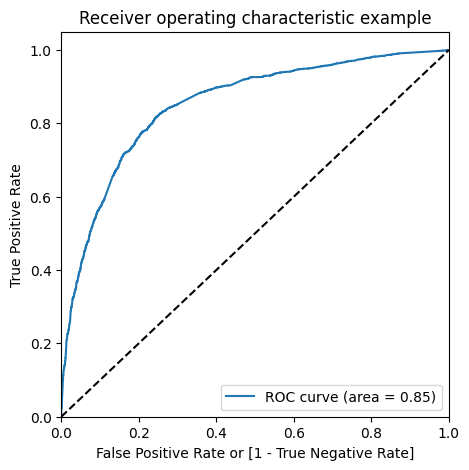

In [397]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [398]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.254329,4715,0,1,1,1,0,0,0,0,0,0,0
1,1,0.573428,7132,1,1,1,1,1,1,1,0,0,0,0
2,0,0.433687,8954,0,1,1,1,1,1,0,0,0,0,0
3,0,0.482882,5283,0,1,1,1,1,1,0,0,0,0,0
4,0,0.526830,3003,1,1,1,1,1,1,1,0,0,0,0


In [399]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.513142  0.975040  0.225151
0.2   0.2  0.708720  0.899758  0.589608
0.3   0.3  0.774583  0.831723  0.738956
0.4   0.4  0.785869  0.748390  0.809237
0.5   0.5  0.786951  0.667874  0.861195
0.6   0.6  0.768862  0.531804  0.916667
0.7   0.7  0.747526  0.433977  0.943022
0.8   0.8  0.721552  0.324477  0.969127
0.9   0.9  0.667285  0.149356  0.990211


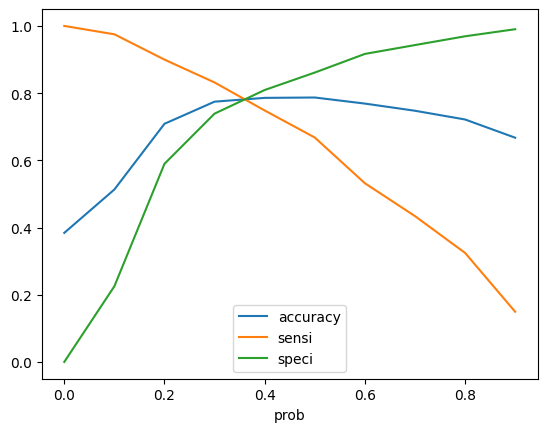

In [400]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [401]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.254329,4715,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.573428,7132,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.433687,8954,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.482882,5283,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.526830,3003,1,1,1,1,1,1,1,0,0,0,0,1


In [402]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.7858688930117501

In [403]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3224,  760],
       [ 625, 1859]])

In [404]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [405]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.748389694041868)

In [406]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8092369477911646)

In [407]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.19076305220883535


In [408]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7098129056891943


In [409]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8376201610808002


In [410]:
# # Define thresholds
# thresholds = [0.5, 0.4]

# # Function to compute metrics from the confusion matrix
# def compute_metrics(confusion):
#     TP = confusion[1,1]
#     TN = confusion[0,0]
#     FP = confusion[0,1]
#     FN = confusion[1,0]
#     accuracy = (TP + TN) / float(TP + TN + FP + FN)
#     sensitivity = TP / float(TP + FN)
#     specificity = TN / float(TN + FP)
#     false_positive_rate = FP / float(TN + FP)
#     positive_predictive_value = TP / float(TP + FP)
#     negative_predictive_value = TN / float(TN + FN)
#     return {
#         'TN': TN,
#         'FP': FP,
#         'FN': FN,
#         'TP': TP,
#         'Accuracy': accuracy,
#         'Sensitivity': sensitivity,
#         'Specificity': specificity,
#         'False_Positive_Rate': false_positive_rate,
#         'Positive_Predictive_Value': positive_predictive_value,
#         'Negative_Predictive_Value': negative_predictive_value
#     }

# # Create a list to store the results
# results = []

# # Calculate confusion matrix values and metrics for each threshold
# for threshold in thresholds:
#     y_train_pred_final[f'predicted_{threshold}'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x >= threshold else 0)
#     confusion = confusion_matrix(y_train_pred_final['Conversion'], y_train_pred_final[f'predicted_{threshold}'])
#     metrics = compute_metrics(confusion)
#     metrics['Threshold'] = threshold
#     results.append(metrics)

# # Convert the list of results to a DataFrame
# metrics_df = pd.DataFrame(results)

# metrics_df

## Precision and Recall

##### Precision
TP / TP + FP

In [411]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.75)

##### Recall
TP / TP + FN

In [412]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

np.float64(0.6678743961352657)

Using sklearn utilities for the same

In [413]:
from sklearn.metrics import precision_score, recall_score

In [414]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [415]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

np.float64(0.75)

In [416]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

np.float64(0.6678743961352657)

### Precision and recall tradeoff

In [417]:
from sklearn.metrics import precision_recall_curve

In [418]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Conversion, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: predicted, Length: 6468, dtype: int64)

In [419]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

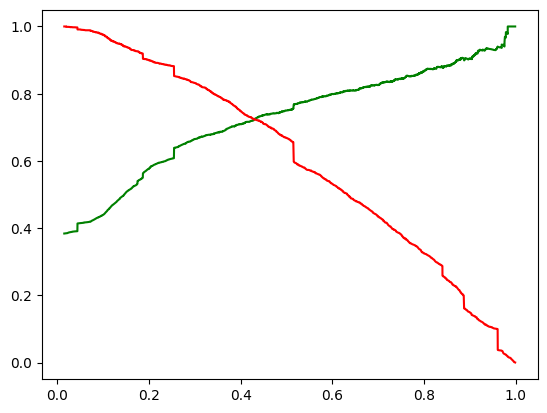

In [420]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test set

In [421]:
X_test[['TotalVisits', 'Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [422]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_LAF,Lead Source_Google,Lead Source_Olark,Last Activity_Olark Chat,Last Activity_Unreach,Last Activity_Visit,Last Notable Activity_Modified,Last Notable Activity_Open,Last Notable Activity_Unreach,Last Notable Activity_Visit
4608,-0.428249,0,1,0,0,0,0,0,1,0,0
7935,0.805598,0,0,0,0,0,0,1,0,0,0
4043,-0.883879,0,0,0,0,0,0,1,0,0,0
7821,-0.298850,0,0,0,0,0,0,0,1,0,0
856,-0.521198,0,1,0,0,0,0,0,1,0,0


In [423]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [424]:
y_test_pred = res.predict(X_test_sm)

In [425]:
y_test_pred[:10]

4608    0.206252
7935    0.325078
4043    0.071873
7821    0.178295
856     0.190276
927     0.174251
318     0.703432
1018    0.354786
8151    0.272388
1570    0.840015
dtype: float64

In [426]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [427]:
# Let's see the head
y_pred_1.head()

,0
4608,0.206252
7935,0.325078
4043,0.071873
7821,0.178295
856,0.190276


In [428]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [429]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [430]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [431]:
y_test_df

,Converted,CustID
0,1,4608
1,0,7935
2,0,4043
3,0,7821
4,0,856
...,...,...
2767,0,4184
2768,0,5023
2769,0,6661
2770,0,2201


In [432]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [433]:
y_pred_final.head()

,Converted,CustID,0
0,1,4608,0.206252
1,0,7935,0.325078
2,0,4043,0.071873
3,0,7821,0.178295
4,0,856,0.190276


In [434]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})




In [435]:
y_pred_final

,Converted,CustID,Conversion_Prob
0,1,4608,0.206252
1,0,7935,0.325078
2,0,4043,0.071873
3,0,7821,0.178295
4,0,856,0.190276
...,...,...,...
2767,0,4184,0.514813
2768,0,5023,0.158665
2769,0,6661,0.043760
2770,0,2201,0.019473


In [436]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID', 'Converted', 'Conversion_Prob']]


In [437]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conversion_Prob
0,4608,1,0.206252
1,7935,0,0.325078
2,4043,0,0.071873
3,7821,0,0.178295
4,856,0,0.190276


In [442]:
y_pred_final.loc[:, 'final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.40 else 0)


In [439]:
y_pred_final.head()

,CustID,Converted,Conversion_Prob,final_predicted
0,4608,1,0.206252,0
1,7935,0,0.325078,0
2,4043,0,0.071873,0
3,7821,0,0.178295,0
4,856,0,0.190276,0


In [445]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7972582972582972

In [446]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1378,  317],
       [ 245,  832]])

In [447]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [448]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.7725162488393686)

In [449]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8129793510324483)